# 1. 라이브러리 불러오기
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 공통 스타일 지정하기
---

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 3. 데이터 불러오기
---

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 4. 데이터 전처리
---

## 4.1 결측치 확인 및 처리

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# 결측치가 많은 컬럼 'deck' 제거
titanic.drop(['deck'], axis = 1, inplace = True)

In [7]:
# age, embark_town에 있는 결측치 제거
titanic.dropna(inplace = True)

In [8]:
# 결측치가 잘 제거되었는지 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


# 5. 데이터 분석&시각화
---

## 5.1 생존 여부
- 생존자보다 사망자가 더 많다.

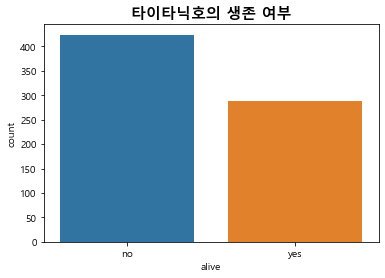

In [9]:
sns.countplot(data = titanic, x = 'alive')
plt.title('타이타닉호의 생존 여부', size = 15, weight = 'bold')

plt.show()

## 5.2 성별
- 탑승자 중에서 남자가 가장 많다. (남자 > 여자 > 아이)
- 탑승자 중 남자가 가장 많이 사망하였으며, 여자가 많이 생존하였다. 아이도 사망자보다 생존자가 더 많다.

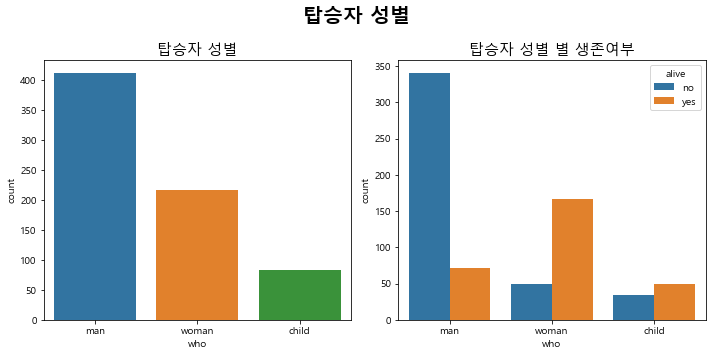

In [10]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data = titanic, x = 'who')
plt.title('탑승자 성별', size = 15)

plt.subplot(1, 2, 2)
sns.countplot(data = titanic, x = 'who', hue = 'alive')
plt.title('탑승자 성별 별 생존여부', size = 15)

plt.suptitle('탑승자 성별', size = 20, weight = 'bold')
plt.tight_layout()

plt.show()

## 5.3 객실 등급
- 객실 등급 중 3등급이 가장 많이 많다.
- 3등급에서 가장 많이 사망하였다.

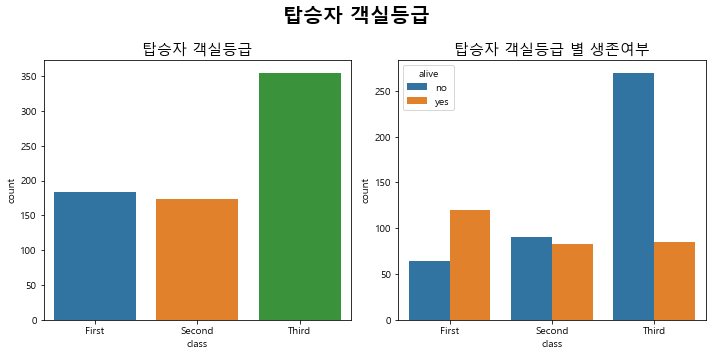

In [11]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data = titanic, x = 'class')
plt.title('탑승자 객실등급', size = 15)

plt.subplot(1, 2, 2)
sns.countplot(data = titanic, x = 'class', hue = 'alive')
plt.title('탑승자 객실등급 별 생존여부', size = 15)

plt.suptitle('탑승자 객실등급', size = 20, weight = 'bold')
plt.tight_layout()

plt.show()

## 5.4 나이
- 탑승자는 0 ~ 5세, 그리고 20 ~ 40대가 많다.
- 그 중에서 20 ~ 40대가 가장 많이 사망하였다.
- 아이는 다른 연령대에 비해 많이 생존했다.

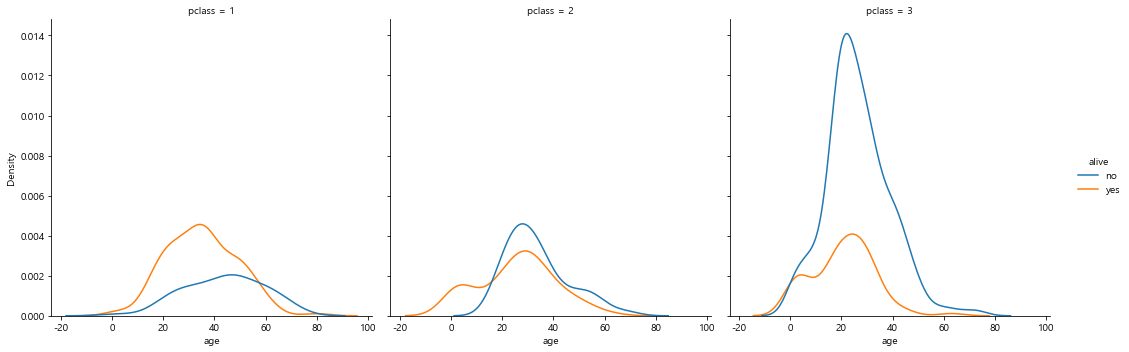

In [25]:
# displot에 특정 컬럼의 카테고리 별로 그래프 그리기
sns.displot(data = titanic, x = 'age', hue = 'alive', col = 'pclass', kind = 'kde')

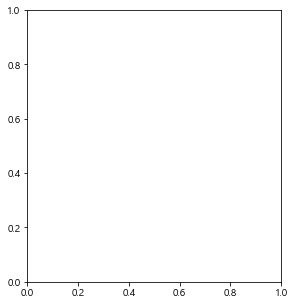

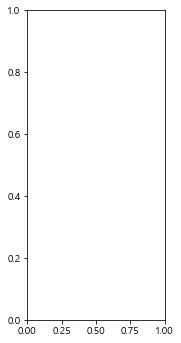

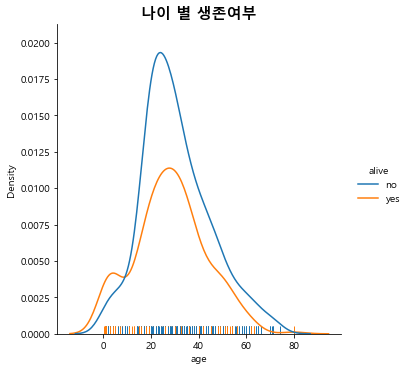

In [12]:
# displot은 subplot으로 그릴 수 없음!
# displot은 figure 레벨에서 그려지기 때문 (axes가 아니라)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
sns.displot(data = titanic, x = 'age', bins = 20, kde = True)
plt.title('나이 별 탑승자 수', size = 15, weight = 'bold')

plt.subplot(1, 2, 2)
sns.displot(data = titanic, x = 'age', hue = 'alive', rug = True, kind = 'kde')
plt.title('나이 별 생존여부', size = 15, weight = 'bold')

plt.show()

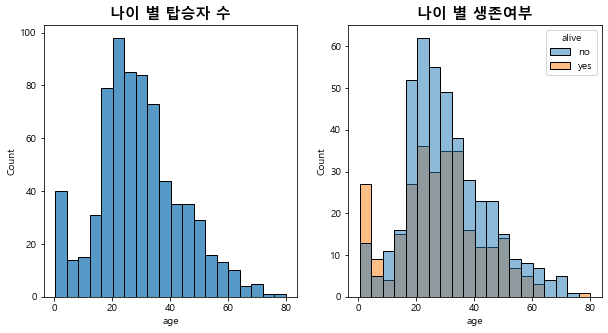

In [13]:
# histplot 사용
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data = titanic, x = 'age', bins = 20)
plt.title('나이 별 탑승자 수', size = 15, weight = 'bold')

plt.subplot(1, 2, 2)
sns.histplot(data = titanic, x = 'age', hue = 'alive')
plt.title('나이 별 생존여부', size = 15, weight = 'bold')

plt.show()

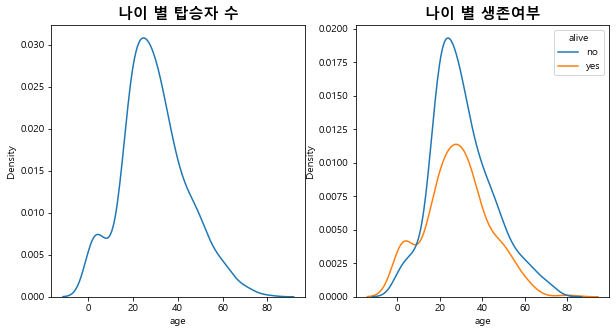

In [14]:
# kdeplot 사용
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data = titanic, x = 'age')
plt.title('나이 별 탑승자 수', size = 15, weight = 'bold')

plt.subplot(1, 2, 2)
sns.kdeplot(data = titanic, x = 'age', hue = 'alive')
plt.title('나이 별 생존여부', size = 15, weight = 'bold')

plt.show()

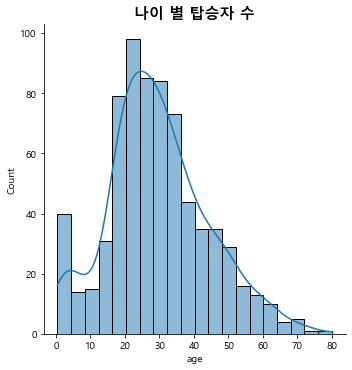

In [15]:
sns.displot(data = titanic, x = 'age', bins = 20, kde = True)
plt.title('나이 별 탑승자 수', size = 15, weight = 'bold')
plt.show()

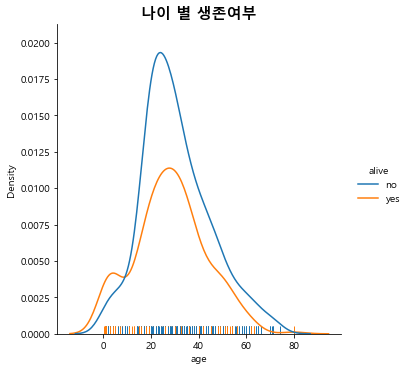

In [16]:
sns.displot(data = titanic, x = 'age', hue = 'alive', rug = True, kind = 'kde')
plt.title('나이 별 생존여부', size = 15, weight = 'bold')
plt.show()

- 등급이 높을 수록 나이가 많은 사람들이 탑승하였으며, 가장 낮은 등급인 3등급에 0 ~ 40대가 많이 탑승하였다.

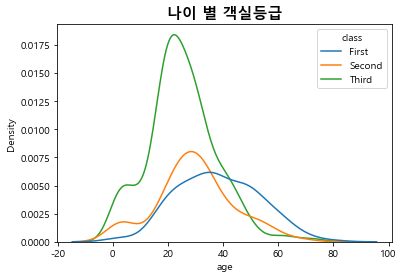

In [17]:
sns.kdeplot(data = titanic, x = 'age', hue = 'class')
plt.title('나이 별 객실등급', size = 15, weight = 'bold')
plt.show()

## 5.5 탑승 항구
- s 항구에 탑승한 사람이 가장 많으며, 사망자도 가장 많다.
- s 항구 탑승자는 남자가 가장 많으며, 객실 등급이 3등급인 사람이 가장 많다.

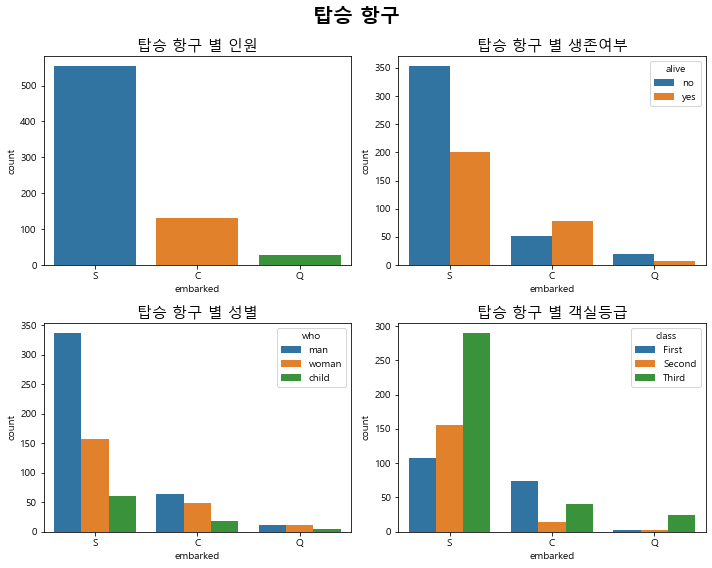

In [18]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
sns.countplot(data = titanic, x = 'embarked')
plt.title('탑승 항구 별 인원', size = 15)

plt.subplot(2, 2, 2)
sns.countplot(data = titanic, x = 'embarked', hue = 'alive')
plt.title('탑승 항구 별 생존여부', size = 15)


plt.subplot(2, 2, 3)
sns.countplot(data = titanic, x = 'embarked', hue = 'who')
plt.title('탑승 항구 별 성별', size = 15)

plt.subplot(2, 2, 4)
sns.countplot(data = titanic, x = 'embarked', hue = 'class')
plt.title('탑승 항구 별 객실등급', size = 15)

plt.suptitle('탑승 항구', size = 20, weight = 'bold')
plt.tight_layout()

plt.show()

## 5.6 요금
- 1등급이 가장 요금이 높다.
- 1등급에서도 요금이 500달러 이상인 경우가 있는데, 동행자가 있는지 확인이 필요하다.

C:\Users\seonghunyun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\seonghunyun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


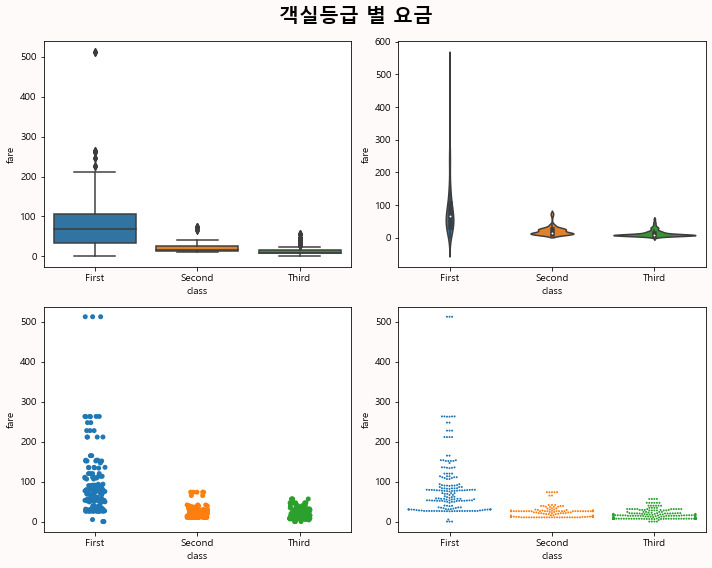

In [19]:
plt.figure(figsize = (10, 8), facecolor = 'snow')

# 박스플롯
plt.subplot(2, 2, 1)
sns.boxplot(data = titanic, x = 'class', y = 'fare')

# 바이올린플롯
plt.subplot(2, 2, 2)
sns.violinplot(data = titanic, x = 'class', y = 'fare')

# 스트립플롯
plt.subplot(2, 2, 3)
sns.stripplot(data = titanic, x = 'class', y = 'fare')

# 스웜플롯
plt.subplot(2, 2, 4)
sns.swarmplot(data = titanic, x = 'class', y = 'fare', s = 2)

plt.suptitle('객실등급 별 요금', size = 20, weight = 'bold')
plt.tight_layout()

plt.show()

- 1등급 중 요금이 500 달러 이상인 경우, 동행자가 없는 경우도 있었다.
- 동행자 유무보다 탑승 항구에 따라 요금이 달라지는 듯하다.
- 그러나 1명의 요금이 500달러 이상인 것이 이상치인지 아닌지 판단할 필요가 있다.

In [20]:
first_500 = titanic[(titanic['class'] == 'First') & (titanic['fare'] > 500)].sort_values('fare', ascending = False)
first_500

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,Cherbourg,yes,True


In [21]:
titanic[(titanic['class'] == 'First') & (titanic['fare'] > 200) & (titanic['fare'] < 500)].sort_values('fare', ascending = False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,Southampton,no,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,Cherbourg,yes,False
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,Cherbourg,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,Cherbourg,no,False
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,Cherbourg,yes,False
380,1,1,female,42.0,0,0,227.5250,C,First,woman,False,Cherbourg,yes,True
700,1,1,female,18.0,1,0,227.5250,C,First,woman,False,Cherbourg,yes,False


- 탑승 항구 별 요금의 분포를 확인해보았다.
- 탑승 항구 'C'의 요금 평균이 가장 높았으며, 특히 요금이 높은 경우가 많다.
- 탑승 항구, 동행 여부와 요금이 관련이 있는지 상관관계를 확인해볼 필요가 있다.

C:\Users\seonghunyun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


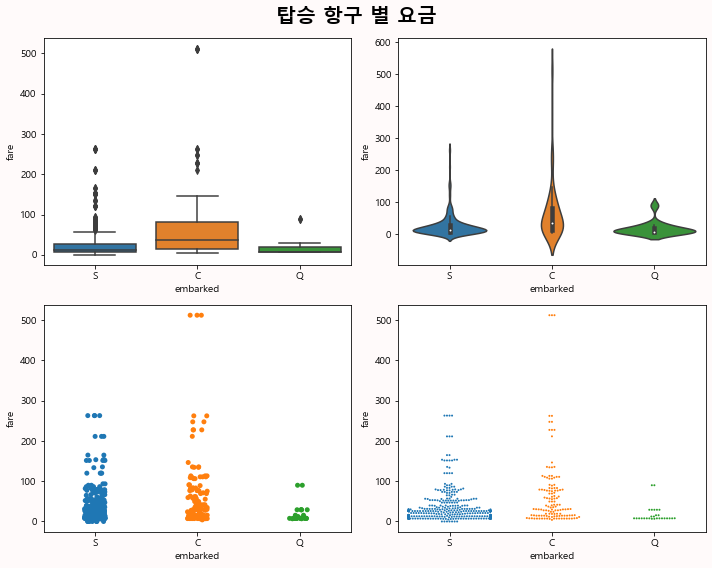

In [22]:
plt.figure(figsize = (10, 8), facecolor = 'snow')

# 박스플롯
plt.subplot(2, 2, 1)
sns.boxplot(data = titanic, x = 'embarked', y = 'fare')

# 바이올린플롯
plt.subplot(2, 2, 2)
sns.violinplot(data = titanic, x = 'embarked', y = 'fare')

# 스트립플롯
plt.subplot(2, 2, 3)
sns.stripplot(data = titanic, x = 'embarked', y = 'fare')

# 스웜플롯
plt.subplot(2, 2, 4)
sns.swarmplot(data = titanic, x = 'embarked', y = 'fare', s = 2)

plt.suptitle('탑승 항구 별 요금', size = 20, weight = 'bold')
plt.tight_layout()

plt.show()